# Process U-Wind: Zonal Mean and Interpolation

This notebook still works on u-Wind data. We will finish the following tasks
* calculate zonal mean
* interpolate zonal means along the axises of latitude and level

## 1. Import libraries

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from scipy.interpolate import interp2d

## 2. Read the data

In [2]:
# specify where is the location of the data
path_in = '../00_data/TA_data/'
path_out = './'
# read the data
df = xr.open_dataset(path_in + 'uwnd.mon.mean.nc')
print(df)

<xarray.Dataset>
Dimensions:    (lat: 73, level: 17, lon: 144, nbnds: 2, time: 494)
Coordinates:
  * level      (level) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-02-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    uwnd       (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    history:        created 2002/03 by Hoop (netCDF2.3)
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    Re

/Users/sonnytruong/soft_install/anaconda3/envs/PhD/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'uwnd' has multiple fill values {-32767, 32766}, decoding all values to NaN.
  use_cftime=use_cftime,


## 3. Take out the variables

In [9]:
lon  = df.lon 
lat  = df.lat 
lev  = df.level  
tim  = df.time
uwnd = df.uwnd

In [4]:
print(lon)

<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. 

In [5]:
print(lat)

<xarray.DataArray 'lat' (lat: 73)>
array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,  67.5,
        65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,  45. ,  42.5,
        40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,
        15. ,  12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
       -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
       -35. , -37.5, -40. , -42.5, -45. , -47.5, -50. , -52.5, -55. , -57.5,
       -60. , -62.5, -65. , -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5,
       -85. , -87.5, -90. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Attributes:
    units:               degrees_north
    actual_range:        [ 90. -90.]
    long_name:           Latitude
    standard_name:       latitude
    axis:                Y
    coordinate_defines:  point


In [6]:
print(lev)

<xarray.DataArray 'level' (level: 17)>
array([1000.,  925.,  850.,  700.,  600.,  500.,  400.,  300.,  250.,  200.,
        150.,  100.,   70.,   50.,   30.,   20.,   10.], dtype=float32)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Attributes:
    units:               millibar
    actual_range:        [1000.   10.]
    long_name:           Level
    positive:            down
    GRIB_id:             100
    GRIB_name:           hPa
    axis:                Z
    coordinate_defines:  point


In [8]:
print(uwnd)
print()
print('uwnd shape:', uwnd.shape)

<xarray.DataArray 'uwnd' (time: 494, level: 17, lat: 73, lon: 144)>
[88279776 values with dtype=float32]
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-02-01
Attributes:
    long_name:             Monthly U-wind on Pressure Levels
    valid_range:           [-32765  -1266]
    unpacked_valid_range:  [-140.  175.]
    actual_range:          [-58.91001 103.15514]
    units:                 m/s
    precision:             2
    GRIB_id:               33
    GRIB_name:             UGRD
    var_desc:              u-wind
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly...
    level_desc:            Pressure Levels
    statistic:             Individual Obs
    parent_stat:           Other
    standard_na

In [12]:
print('first time:', tim[0].values)
print('last time:', tim[-1].values)

first time: 1979-02-01T00:00:00.000000000
last time: 2020-02-01T00:00:00.000000000


## 4. Calculate the average

In [15]:
# first, average in time
print('uwnd shape before time averaging:', uwnd.shape)
tave_uwnd = uwnd.mean(axis=0) 
print('uwnd shape after time averaging:', tave_uwnd.shape)
# second, zonal average
zonal_ave_uwnd = tave_uwnd.mean(axis=2) 
print('uwnd shape after zonal averaging:', zonal_ave_uwnd.shape)

uwnd shape before time averaging: (494, 17, 73, 144)
uwnd shape after time averaging: (17, 73, 144)
uwnd shape after zonal averaging: (17, 73)


## 5. Plotting

### 5.1 Extract first 10 levels from 1000 to 200 hPa

In [8]:
lev_10 = lev[0:10]
u_10y_zm_10 = u_10y_zm[0:10,:]

### 5.2 Visualize

/Users/sonnytruong/soft_install/anaconda3/envs/PhD/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'c'
  


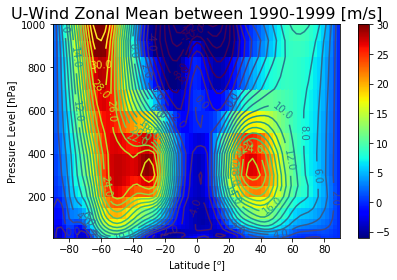

In [19]:
#minu = floor(np.min(u_10y_zm_10))
#maxu = ceil(np.max(u_10y_zm_10))
lev = lev[::-1]
[lats, levs] = np.meshgrid(lat, lev)
fig, ax = plt.subplots()

im = ax.pcolormesh(lats, levs, zonal_ave_uwnd,  cmap='jet', vmin=-6., vmax=30.)
cf = ax.contour(lats, levs, zonal_ave_uwnd, 25, c='b',  vmin=-6., vmax=30.)

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%'
else:
    fmt = '%r'
ax.clabel(cf, inline=True, fmt=fmt, fontsize=10)

ax.set_title('U-Wind Zonal Mean between 1990-1999 [m/s]', fontsize=16)
ax.set_xlabel('Latitude [$^o$]')
ax.set_ylabel('Pressure Level [hPa]')

# set the limits of the plot to the limits of the data
ax.axis([lats.min(),lats.max(), levs.min(), levs.max()])

fig.colorbar(im)
fig.tight_layout()

## 6. Interpolate zonal mean from 10 to 41 levels

### 6.1 Make new grids

Create new levels between 1000 and 200

make resolution of latitude from 2.5 to 1.0
> It is worth noting to make level and latitude in a monotonic increasing manner.

In [10]:
lev_new = np.linspace(200,1000, num=41)
lat_new = np.linspace(-90, 90, num=181)

### 6.2 Begin to interpolate u_10y_zm_10 for new grids

In [11]:
func = interp2d(lat, lev_10, u_10y_zm_10, kind='cubic')
# apply to new level and latitude
unew = func(lat_new, lev_new)

### 6.3 Visualize the interpolated zonal mean

It should look better than orignal data.

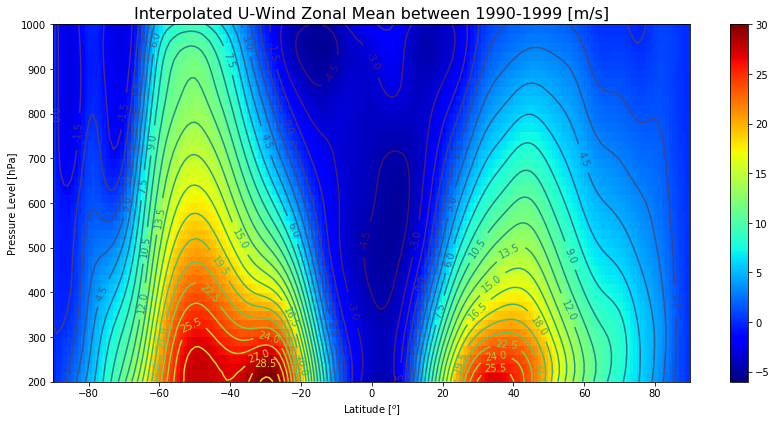

In [12]:
#minu = floor(np.min(unew))
#maxu = ceil(np.max(unew))
[lats, levs] = np.meshgrid(lat_new, lev_new)
fig, ax = plt.subplots()

im = ax.pcolormesh(lats, levs, unew, cmap='jet', vmin=-6., vmax=30.)
cf = ax.contour( lats, levs, unew, 25, c='b',  vmin=-6., vmax=30.)

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%'
else:
    fmt = '%r'
ax.clabel(cf, inline=True, fmt=fmt, fontsize=10)

ax.set_title('Interpolated U-Wind Zonal Mean between 1990-1999 [m/s]', fontsize=16)
ax.set_xlabel('Latitude [$^o$]')
ax.set_ylabel('Pressure Level [hPa]')

# set the limits of the plot to the limits of the data
ax.axis([lats.min(),lats.max(), levs.min(), levs.max()])

fig.colorbar(im)
fig.tight_layout()